Problem Statement: Understanding target customers for marketing team to plan a strategy
-Identifying most important shopping groups by annual income, spending habits, age, gender etc.

Objective: Market Segmentation - Divide your mall target market into approachable groups. Create subsets of a market based on demographics behavioral criteria to better understand the target for marketing activities.

Approach :


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/lipis/Downloads/Mall_Customers.csv")


In [3]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

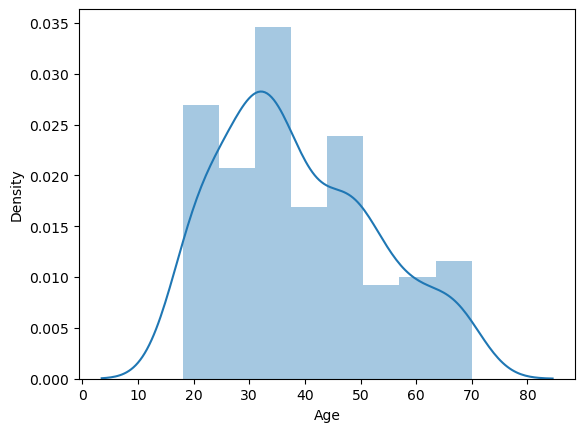

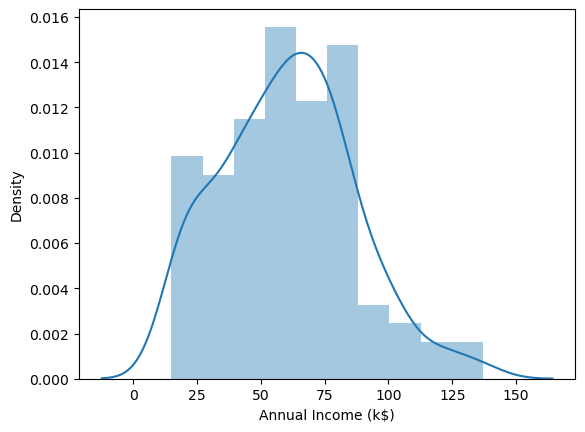

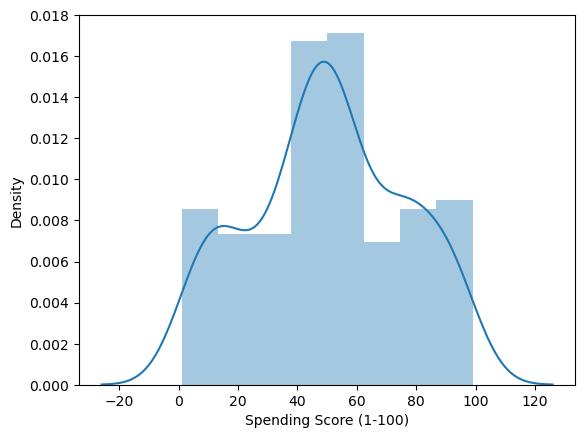

In [6]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns :
    plt.figure()
    sns.distplot(df[i])
      

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True, hue=df['Gender'])

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 640x480 with 0 Axes>

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [ ]:
df['Gender'].value_counts(normalize=True)

# Bivariate Analysis

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

In [ ]:
sns.pairplot(df, hue='Gender')

In [ ]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [ ]:
clustering1 = KMeans(n_clusters=3)

In [ ]:
clustering1.fit(df[['Annual Income (k$)']])

In [ ]:
clustering1.labels_

In [ ]:
df['Income Cluster'] = clustering1.labels_
df.head()

In [ ]:
df['Income Cluster'].value_counts()

In [ ]:
clustering1.inertia_

In [ ]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [ ]:
inertia_scores

In [ ]:
plt.plot(range(1,11),inertia_scores)

In [ ]:
#hence, optimal number of clusters=3

In [ ]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

In [ ]:
#Bivariate Clustering

In [ ]:
clustering2= KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

In [ ]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2)

In [ ]:
#hence, optimal number of clusters = 5

In [ ]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivariate.png')

In [ ]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'], normalize='index')

In [ ]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

In [ ]:
#multivariate clustering
from sklearn.preprocessing import StandardScaler

In [ ]:
scale= StandardScaler()

In [ ]:
df.head()

In [ ]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

In [ ]:
dff.columns


In [ ]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

In [ ]:
dff = scale.fit_transform(dff)

In [ ]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

In [ ]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [ ]:
#hence, optimal number of clusters = 4

In [ ]:
df


In [ ]:
df.to_csv('Clustering.csv')

Analysis:
Target Cluster
-Target group would be cluster 1 which has a high Spending Score and high income

-54 percent of cluster 1 shoppers are women. We should look for ways to attract these customers using a marketing campaign targeting popular items in this cluster

-Cluster 2 presents an interesting opportunity to market to the customers for sales event on popular items.
